Initial Data Exploration

In [1]:
# Load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("vgsales.csv")

# Preview the dataset
print("Preview of the dataset:")
print(df.head())

# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# Dataset info
print("Dataset Info:")
print(df.info())


Preview of the dataset:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
Missing values in the dataset:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher 

Statistical Summary

In [2]:
# Statistical summary of numerical columns
print("Statistical Summary:")
print(df.describe())


Statistical Summary:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.04

Correlation Analysis

Correlation Matrix:
                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


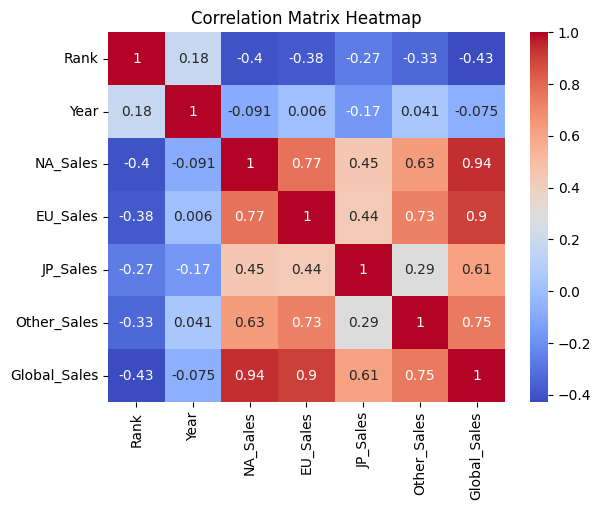

In [3]:
# Select only numeric columns from the dataset
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Print and visualize the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


Sales Analysis by Genre

Sales by Genre:
Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


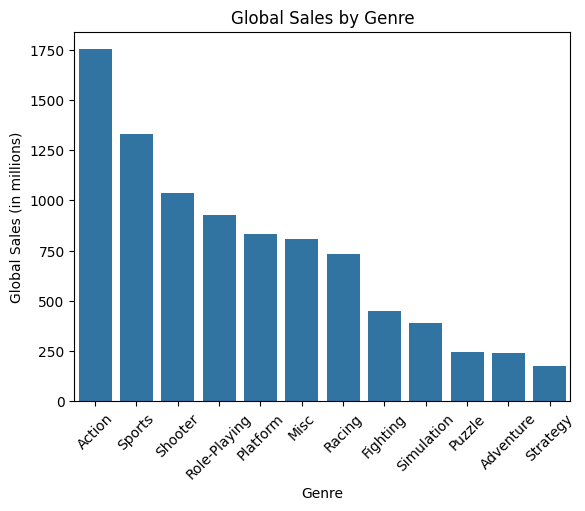

In [4]:
# Analyze sales by genre
print("Sales by Genre:")
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(sales_by_genre)

# Visualize sales by genre
sns.barplot(x=sales_by_genre.index, y=sales_by_genre.values)
plt.title("Global Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Global Sales (in millions)")
plt.xticks(rotation=45)
plt.show()


Sales Analysis by Platform

Sales by Platform:
Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64


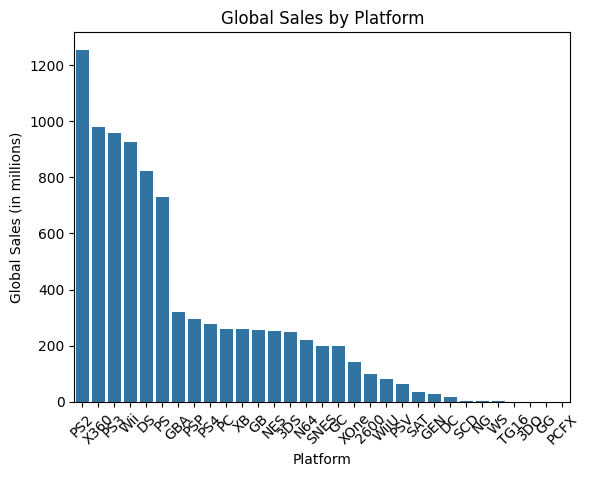

In [5]:
# Analyze sales by platform
print("Sales by Platform:")
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
print(sales_by_platform)

# Visualize sales by platform
sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values)
plt.title("Global Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Global Sales (in millions)")
plt.xticks(rotation=45)
plt.show()


Sales Trends by Year

Sales by Year:
Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64


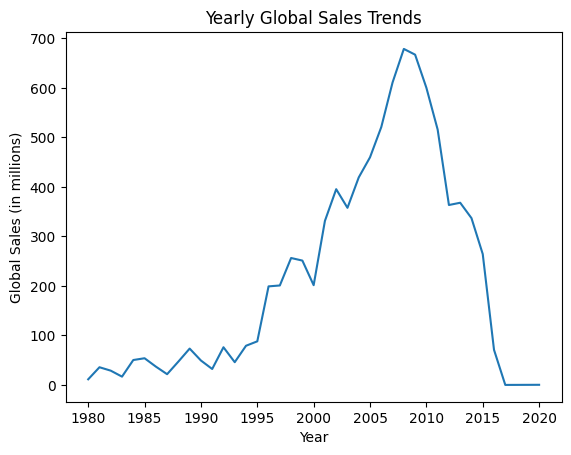

In [6]:
# Analyze sales trends over the years
print("Sales by Year:")
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
print(sales_by_year)

# Visualize yearly sales trends
sales_by_year.plot(kind='line', title="Yearly Global Sales Trends")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.show()


Identify Profitable Genre and Platform

In [7]:
# Compute total global sales by platform
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Identify the platform with the highest sales
top_platform = sales_by_platform.idxmax()
print(f"Top Platform: {top_platform}")

# For reference, also display sales by platform
print("Sales by Platform:")
print(sales_by_platform)

Top Platform: PS2
Sales by Platform:
Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64
